# Feature Engineering Intro I
<hr style="border:2px solid black">

## Introduction

What is our __goal__ when we __train a machine learning model__ (ML)?

<img src = "./images/basic_model.png" width=400>

The primary goal when training a machine learning model is to develop a system that can accurately make predictions or decisions based on input data. 
But how do we improve the accuracy of our predictions?

**Selecting the right model** is essential, but it's only the beginning. Beyond model selection, we must explore other strategies to refine our model's learning, resulting in more **accurate predictions**.

Consider the learning process of the model:

When provided with `X_train` input, the algorithm determines the optimal parameters to align the model’s output with the known `y_train` values.

To elevate our model from just okay to truly effective, we must actively support its learning process.

So, what strategies can we employ to achieve this?


## What is Feature Engineering?
The diagram below is **over-simplified**. Simply feeding our algorithm with all the raw data results in a model that is equally raw and messy. Instead, we need to **clean up** the data and make **creative decisions** to select the **key features** that will enable the model to accurately predict outcomes.

<img src = "./images/feature_eng.png" width=500>

Some aspects of **feature engineering** are methodical and consistent. We'll explore these first.

The other aspects are more similar to an **art form**, requiring a deep understanding of the subject and a bit of **human intuition**.

The process of **feature engineering** can be one of the most **time-consuming** parts of modeling, but it's essential. Without it, your model will struggle to discern patterns amidst the noise.


**Estimated time spent with data organizing**

<img src = "./images/stacked-chart.jpeg" width=400>

### Feature engineering techniques

 |       technique      |                                        usefulness                                |
 |:--------------------:|:--------------------------------------------------------------------------------:|
 |     `Imputation`     |                    fills out missing values in data                    |
 |   `Discretization`   |                groups a feature in some logical fashion into bins                |
 |`Categorical Encoding`|encodes categorical features into numerical values|
 |  `Feature Splitting` |splits a feature into parts|
 |   `Feature Scaling`  |handles the sensitivity of ML algorithms to the scale of input values| 
 |`Feature Expansion`|derives new features from existing ones|
 | `Log Transformation` |deals with ill-behaved (skewed of heteroscedastic) data       |
 |   `Outlier Handling` |takes care of unusually high/low values in the dataset|
 | `RBF Transformation` |uses a continuous distribution to encode ordinal features|

### Feature engineering best practices

#### 1. **Split Dataset** into Train and Test sub-samples as early as possible

While this process is flexible—for example, you can remove NaNs from the entire dataset before filling—it's generally a better practice, in the interest of good machine learning habits, to perform this step **after splitting**. If you remove or impute missing values before splitting, information from the test set could influence the training process, leading to overly optimistic performance estimates.

#### 2. **Feature Engineering** Includes any pre-processing techniques, such as:

- Dropping missing values
- Converting strings or non-numeric values into numeric values
- Combining features
- Creating new features

#### 3. **Feature Engineer Test Data** the same way as train data

Make sure to process the test data in the same way as training data.



<hr style="border:2px solid black">

## Example: Penguin Data

#### Load Packages

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [2]:
df = pd.read_csv('./data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


#### Quick Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      339 non-null    float64
 4   flipper_length_mm  340 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,339.000000,340.000000,342.000000
mean,43.921930,17.132448,200.938235,4201.754386
std,5.459584,1.972956,14.024179,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.550000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.600000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Features and Target


In [5]:
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm'
]

categorical_features = [
    'species',
    'island',
    'sex'
]

features = numerical_features + categorical_features

target_variable = 'body_mass_g'

#### Feature-Target separation

In [6]:
# Feature matrix 
X = df[features]

# Target column
y = df[target_variable]

#### Train-Test Split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (256, 6)
Test shape: (86, 6)


This code snippet **splits** the dataset into training and testing sets, where 25% of the data is reserved for testing. The `random_state` parameter ensures that the **split** is reproducible; the same random split will occur each time the code is run. The `shuffle` ensures that the data is shuffled before the split.


For teaching purposes, we'll demonstrate how to add a **validation set** in addition to the usual **train-test split**. The validation set is important to properly **evaluate** and **fine-tune** a model before final testing.

In [90]:
# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (171, 6)
Validation shape: (85, 6)


### Exploratory Data Analysis

For **Exploratory Data Analysis (EDA)**, you should concatenate `X_train` and `y_train`. This allows you to analyze also the relationship between features and the target variable.

In [91]:
# Assuming X_train is a DataFrame and y_train is a Series
df_train = pd.concat([X_train, y_train], axis=1)

print("Combined train data shape:", df_train.shape)

Combined train data shape: (171, 7)


**Show Some Plots**

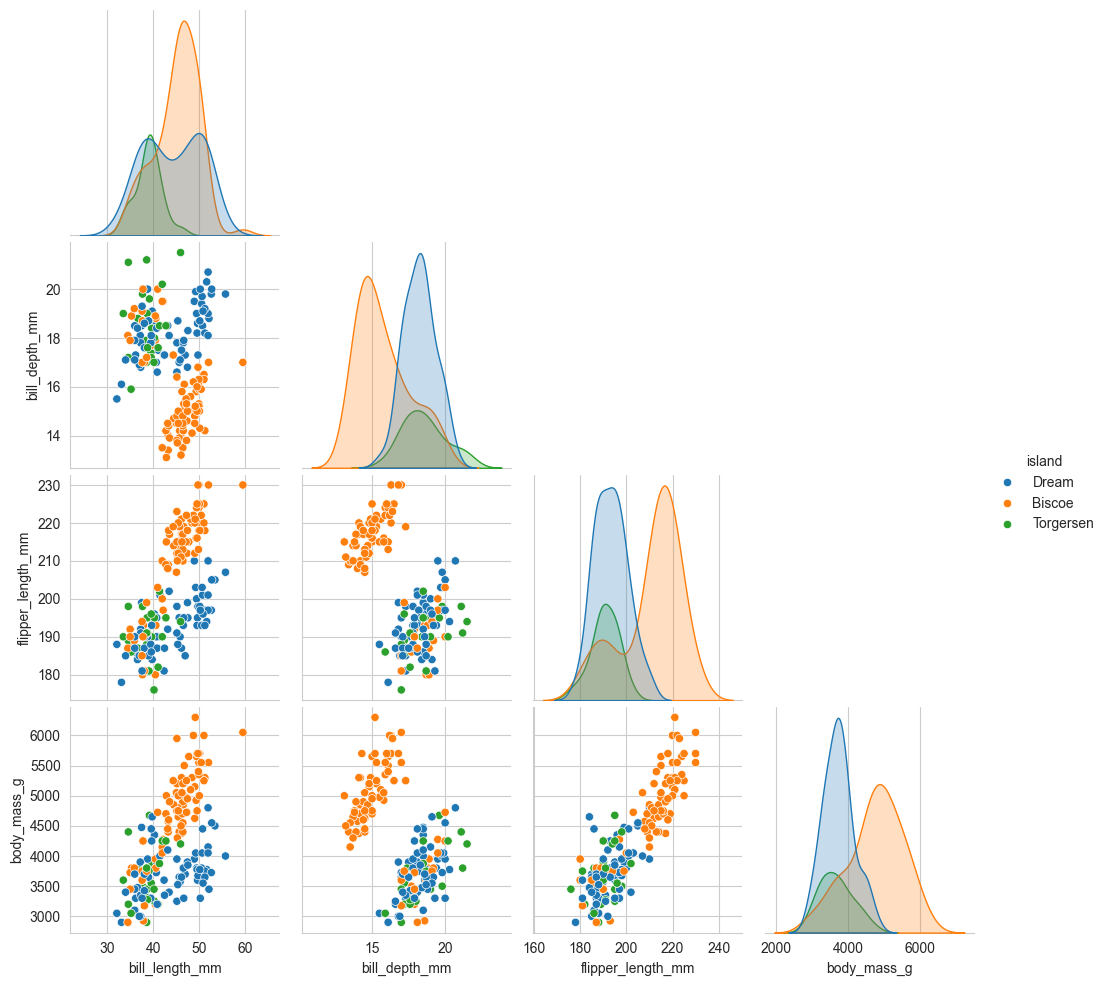

In [10]:
sns.pairplot(df_train,corner=True,hue='island');

The above **pairplot** shows both distribution of single variables and the relationships between two variables. 

1. **Scatter Plots**:
   - Each plot below the diagonal shows how two variables relate to each other. For example, in the plot where 'flipper_length_mm' meets 'bill_length_mm', each point represents those two measurements for one observation.

2. **Histograms/Density Plots**:
   - The plots along the diagonal show how frequently different values occur for a single variable. For instance, the plot for 'bill_depth_mm' displays the distribution of bill depths among all observations.

3. **Color**:
   - The colors represent different categories, in this case, categorized by 'island'. This helps to quickly see if measurements vary noticeably by island, with each color representing a different island.


One can create also other pairplots considering as the extra dimension `hue` the sex variable or the species variable. 

In [11]:
df_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex,body_mass_g
178,49.5,19.0,200.0,Chinstrap,Dream,Male,3800.0
213,45.7,17.0,195.0,Chinstrap,Dream,Female,3650.0
246,47.8,15.0,215.0,Gentoo,Biscoe,Male,5650.0
185,49.7,18.6,195.0,Chinstrap,Dream,Male,3600.0
216,49.6,18.2,193.0,Chinstrap,Dream,Male,3775.0
...,...,...,...,...,...,...,...
284,49.8,16.8,230.0,Gentoo,Biscoe,Male,5700.0
18,46.0,21.5,194.0,Adelie,Torgersen,Male,4200.0
154,45.4,18.7,188.0,Chinstrap,Dream,Female,3525.0
8,42.0,20.2,190.0,Adelie,Torgersen,NaN,4250.0


>**Note** that the **indices** in the DataFrame shown above appear in a **random order**, a result of **shuffling** prior to the data split.


#### Issue with the Data

**Many models cannot handle** missing values, **categorical features** with non-numeric values, or **metric features** with varying magnitudes. Proper data preprocessing is essential to prepare the data for these models.


**Check Missing Values**

First, let's take a look at what's missing:

In [12]:
df_train.isna().sum()

bill_length_mm       0
bill_depth_mm        1
flipper_length_mm    2
species              0
island               0
sex                  2
body_mass_g          0
dtype: int64

`isna()`and `isnull()` are identical methods that produce a boolean mask where True is a missing value. If we want to turn this into a useful view, we can filter using these masks.

In [13]:
# To find the rows with NaN
df_train.loc[df_train.isna().any(axis=1)]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species,island,sex,body_mass_g
190,53.5,NaN,205.0,Chinstrap,Dream,Male,4500.0
30,37.2,18.1,NaN,Adelie,Dream,Male,3900.0
323,47.3,13.8,NaN,Gentoo,Biscoe,NaN,4725.0
8,42.0,20.2,190.0,Adelie,Torgersen,NaN,4250.0


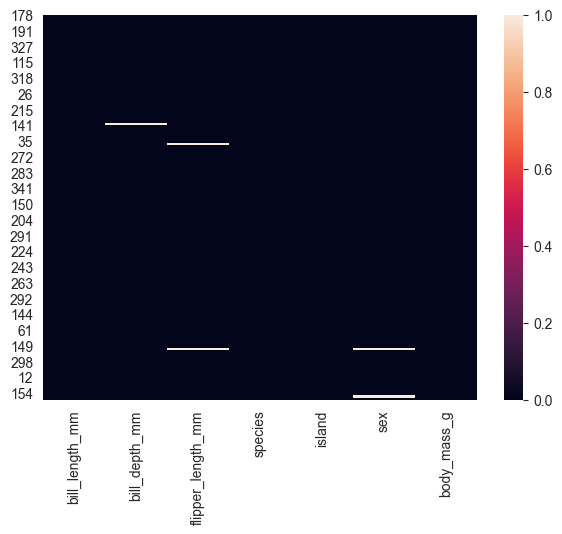

In [14]:
# check missing values graphically
plt.figure(figsize=(7,5), dpi=100)
sns.heatmap(df_train.isna());

So, looking at either of these, we can see two missing values in both `bill_length_mm` and `flipper_length_mm` columns and six in the `sex` column. How do we deal with them?

<hr style="border:2px solid black">

## 1. Imputation - Filling in the Blanks

#### What can we do with missing information?
There are __few strategies__:

- __Drop__:
    + rows with missing values
    + columns with a lot of missing values
- __Fill with a value__:
    + __mean__/__median__/__mode__ of a column
    + __interpolate__ / __back fill__ / __forward fill__
    + __mean__/__median__/__mode__ of a group

- With `pandas`: 
    - `df.isna()`: checks for NaNs, then do a sum or a heatmap
    - `df.dropna()`: drop NaNs
    - `df.fillna()`: fill NaNs

One would to use `inplace=True` in these examples to modify the DataFrame directly.

---

#### 1.1 `SimpleImputer`

We can use the scikit-learn  <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">`SimpleImputer()`</a>  to quickly impute the missing data in a column. There are three strategies available:

 * `strategy = 'mean'` - **the default option**, numeric only
 
 * `strategy = 'median'` - numeric only
 
* `strategy = 'most_frequent'` - mode, numeric or categorical
 
 * `strategy = 'constant'` - needs additional arg `fill_value`, numeric or categorical

If your missing values aren't NaN (i.e. - None, 0, 999, "badvalue", etc), you may need to use the `missing_value` argument to let it know what to look for.

In [15]:
from sklearn.impute import SimpleImputer

**Sex Column Imputation with the most frequent value**


In [16]:
X_train['sex'].value_counts(dropna=False)

sex
Female    87
Male      82
NaN        2
Name: count, dtype: int64

In [17]:
# Instantiating a SimpleImputer object
sex_imputer = SimpleImputer(strategy='most_frequent')#.set_output(transform='pandas')

In [18]:
# Fit the variable imputer on the 'sex' column training data
sex_imputer.fit(X_train[['sex']])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


`.fit` teaches the imputer what to insert. In this example the imputer scans through the `sex` column in the training dataset (`X_train`) to determine the most frequent value in that column. After `fitting`, the imputer will inernally store the mode of that column in its `statistics_` attribute.

In [19]:
sex_imputer.statistics_

array(['Female'], dtype=object)

In [20]:
# Applying the transformation to the 'sex' column of the training data using the pre-fitted imputer.
sex_imputed_train = sex_imputer.transform(X=X_train[['sex']])
sex_imputed_train

array([['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],


The `transform` method uses a pre-trained imputer to fill in the `missing values` in the `sex` column. By default, this method returns a numpy array rather than a pandas DataFrame. If you need to convert this numpy array back into a DataFrame, it's important to ensure that the index of the new DataFrame aligns with the original one to maintain data consistency.

In [21]:
# The long way to the dataframe  
sex_imputed_df_train = pd.DataFrame(data=sex_imputed_train, columns=sex_imputer.get_feature_names_out(), index=X_train.index)
sex_imputed_df_train

,sex
178,Male
213,Female
246,Male
185,Male
216,Male
...,...
284,Male
18,Male
154,Female
8,Female


In [22]:
sex_imputed_df_train.value_counts(dropna=False)

sex   
Female    89
Male      82
Name: count, dtype: int64

**How should we impute missing values in the test data?**

When imputing missing values - or applying other data transformations to the **test data**, it is important to **avoid using any information outside of the training data**. This helps us to avoid **data leakage** during the model building process. Therefore, you should apply only those transformations to the test data that are based on parameters established from the training data. Thus, in the context of scikit-learn, we use only the __transform method__ of the imputer or other transformation tools.

🚨🚨🚨**Very Important**🚨🚨🚨

As shown in the [machine learning workflow](../machine_learning_workflow.md#the-machine-learning-workflow) it is good practice to unlock and transform the test data only at the very end.

In [23]:
sex_imputed_test = sex_imputer.transform(X_test[['sex']])
sex_imputed_test

array([['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Female'],
       ['Male'],
       ['Female'],
       

In [24]:
sex_imputed_df_test = pd.DataFrame(data=sex_imputed_test,columns=sex_imputer.get_feature_names_out(), index=X_test.index)
sex_imputed_df_test

,sex
237,Female
116,Male
113,Female
42,Male
126,Male
...,...
238,Male
94,Male
282,Male
148,Male


---

**Imputation of 'Flipper Length' and 'Bill Depth' Columns Using Median Values**

We will follow the same steps we used for the 'sex' column to address missing values in the 'flipper length' and 'bill depth' columns. But in this case we will use the **median imputation** strategy.

In [25]:
# Instantiating a SimpleImputer object
flipper_bill_imputer = SimpleImputer(strategy='median').set_output(transform='pandas')
flipper_bill_imputer

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


The `set_output()` method sets the default otput of the `transform()` methods to a pandas DataFrame.

In [26]:
# Fit the variable imputer on the flipper_length_mm' and 'bill_depth_mm' columns of the training data
flipper_bill_imputer.fit(X_train[['flipper_length_mm','bill_depth_mm']])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [27]:
# Check the median parameters stored in the imputer after the fit
flipper_bill_imputer.statistics_

array([198. ,  17.3])

In [28]:
X_train[['flipper_length_mm','bill_depth_mm']].median()

flipper_length_mm    198.0
bill_depth_mm         17.3
dtype: float64

In [29]:
# Applying the transformation to the flipper_length_mm' and 'bill_depth_mm' columns of the training data using the pre-fitted imputer.
flipper_bill_imputed_df_train = flipper_bill_imputer.transform(X_train[['flipper_length_mm','bill_depth_mm']])
flipper_bill_imputed_df_train.isna()

,flipper_length_mm,bill_depth_mm
178,False,False
213,False,False
246,False,False
185,False,False
216,False,False
...,...,...
284,False,False
18,False,False
154,False,False
8,False,False


<hr style="border:2px solid black">

## 2. Categorical encoding - Replacing categories with numbers


Most algorithms aren't capable of handling strings, but there are some helpful tools to convert them into integers.


### 2.1 `OneHotEncoder` for **nominal variables** (categories without inherent order)
We can use the scikit-learn <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder">`OneHotEncoder()`</a> to get dummy values for our categorical data. It converts each category within a column into a separate binary column. Each category is represented by a **1** in its respective column for instances where it appears, and **0** where it does not. There are two options for chosing which columns to drop to avoid perfect collinearity - a common statistical issue for some models:
 
 * `drop = 'first'` - drops the first category in each feature. If there's only one category, it will drop the feature altogether.
 
 * `drop = 'if_binary'` - will only drop a category if the feature is binary (i.e. - yes/no, on/off, etc). Features with one or more than two categories will remain untouched.

After transforming our dataset, we can use `get_feature_names_out()` to get an array of feature names to label the columns.



In [30]:
from sklearn.preprocessing import OneHotEncoder

What are the **unique categories** in the `species` column/feautre?

In [31]:
X_train['species'].unique()

array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object)

In [32]:
# Instantiating a OneHotEncoder object
species_ohencoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True)

+ The `handle_unknown` parameter tells the encoder how to deal with categories in new data that weren't present during its initial fitting.
+ When you set `sparse_output=True`, the encoder returns the transformed data as a **sparse matrix** instead of a dense numpy array.
  + **Dense Matrix**
    + Stores all values explicitly, including zeros
    + Very memory-intesive when the matrix has a lot of zeros
  + <a href="https://en.wikipedia.org/wiki/Sparse_matrix#:~:text=In%20numerical%20analysis%20and%20scientific,of%20the%20elements%20are%20zero.">**Sparse Matrix**</a>
    + Stores only the locations and values of non-zero elements
    + Reduces memory usage
    + Speeds up operations

In [33]:
# Fit the variable encoder on the 'species' column of the training data
species_ohencoder.fit(X=X_train[['species']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",'first'
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_ca

In [34]:
# unique categories of the train species column learnt and stred in the encoder
species_ohencoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)]

In [35]:
# new columns/featureeaure of the categories
species_ohencoder.get_feature_names_out()


array(['species_Chinstrap', 'species_Gentoo'], dtype=object)

**Note that `species_Adelie` has been dropped**

In [36]:
species_encoded_train_sparse = species_ohencoder.transform(X=X_train[['species']])
species_encoded_train_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 101 stored elements and shape (171, 2)>

We have a **Compressed Sparse Row (CSR)** sparse matrix with dimensions **(nrows, ncols) = (256, 2)**, where most of the entries are zero. This matrix efficiently stores only the 149 non-zero entries, as floating-point numbers.

In [37]:
# Convert a sparse matrix to a dense matrix
species_encoded_train_dense = species_encoded_train_sparse.todense()
species_encoded_train_dense

matrix([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [0

In [38]:
# Convert the 
species_encoded_train_df = pd.DataFrame(data=species_encoded_train_dense, columns=species_ohencoder.get_feature_names_out(), index=X_train.index)
species_encoded_train_df


,species_Chinstrap,species_Gentoo
178,1.0,0.0
213,1.0,0.0
246,0.0,1.0
185,1.0,0.0
216,1.0,0.0
...,...,...
284,0.0,1.0
18,0.0,0.0
154,1.0,0.0
8,0.0,0.0


In [39]:
# Let's see the encoded species columns for two penguins
species_encoded_train_df.loc[[24,323]]

,species_Chinstrap,species_Gentoo
24,0.0,0.0
323,0.0,1.0


**How to read the 👆🏽 DataFrame**?

+ Observation (the penguin) n 24 does not belong neither to the species `Chinstrap` not `Gentoo` but `Adelie`
+ Observation (the penguin) n 323 belong to the species `Gentoo` 

### 2.2 `OrdinalEncoder` for **Ordinal Variables** (Categories with Inherent Order)


We can use the scikit-learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html">`OrdinalEncoder()`</a> to encode ordinal categories into meaningful numeric values. This encoder is particularly useful for categories that have a natural ordered relationship. Here are some key points:

* `categories` - specifies the order of categories explicitly if the default lexical order is not desired.

* `dtype` - the data type of the output (default is `float64`).

* `handle_unknown` - decides how to handle unknown categories that appear during transformation:
  
  * `handle_unknown='error'` - **the default option**, throws an error if an unknown category is encountered.
  
  * `handle_unknown='use_encoded_value'` - allows assigning a specific integer for unknown categories with additional arg `unknown_value`.

If your categories have a meaningful order, specify this in the `categories` argument to ensure the encoding respects the ordinal nature.


As in the penguins dataset we don't have a feature with ordinal categories, let's consider a simple case involving an ordinal feature: "Education Level". The categories, listed in order of their educational achievement, are:

+ High School
+ Bachelor's
+ Master's
+ Doctorate

In ordinal encoding, each category is assigned a unique integer based on its order.
Here is how you can map these categories:
+ High School --> 0
+ Bachelor's --> 1
+ Master's  --> 2
+ Doctorate --> 3
  


In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
train_data = [['Bachelor\'s'], ['High School'],  ['Doctorate'], ['Master\'s'], ['Doctorate']]
df_train_data_ = pd.DataFrame(data=train_data, columns=['education_level'])
df_train_data_

,education_level
0,Bachelor's
1,High School
2,Doctorate
3,Master's
4,Doctorate


In [42]:
# Instantiate the encoder object
edu_encoder = OrdinalEncoder(categories=[['High School', 'Bachelor\'s', 'Master\'s', 'Doctorate']],dtype=int).set_output(transform='pandas')

In [43]:
# Fit the variable encoder on the 'education_level' column of the training data
edu_encoder.fit(df_train_data_[['education_level']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute.","[['High School', ""Bachelor's"", ...]]"
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'int'>
,"handle_unknown handle_unknown: {'error', 'use_encoded_value'}, default='error'When set to 'error' an error will be raised in case an unknowncategorical feature is present during transform. When set to'use_encoded_value', the encoded value of unknown categories will beset to the value given for the parameter `unknown_value`. In:meth:`inverse_transform`, an unknown category will be denoted as None... versionadded:: 0.24",'error'
,"unknown_value unknown_value: int or np.nan, default=NoneWhen the parameter handle_unknown is set to 'use_encoded_value', thisparameter is required and will set the encoded value of unknowncategories. It has to be distinct from the values used to encode any ofthe categories in `fit`. If set to np.nan, the `dtype` parameter mustbe a float dtype... versionadded:: 0.24",None
,"encoded_missing_value encoded_missing_value: int or np.nan, default=np.nanEncoded value of missing categories. If set to `np.nan`, then the `dtype`parameter must be a float dtype... versionadded:: 1.1",nan
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None
,"max_categories max_categories: int, default=NoneSpecifies an upper limit to the number of output categories for each inputfeature when considering infrequent categories. If there are infrequentcategories, `max_categories` includes the category representing theinfrequent categories along with the frequent categories. If `None`,there is no limit to the number of output features.`max_categories` do **not** take into account missing or unknowncategories. Setting `unknown_value` or `encoded_missing_value` to aninteger will increase the number of unique integer codes by one each.This can result in up to `max_categories + 2` integer codes... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None


In [44]:
# learned and stored categories by the encoder
edu_encoder.categories_

[array(['High School', "Bachelor's", "Master's", 'Doctorate'], dtype=object)]

In [45]:
# Encode the 'education_level' column in the train data
edu_encoded_df_train = edu_encoder.transform(df_train_data_)
edu_encoded_df_train

,education_level
0,1
1,0
2,3
3,2
4,3


#### Summary

`OrdinalEncoder()` and `OneHotEncoder()` turn categorical data into an integer

`OrdinalEncoder()` results in a single column

`OneHotEncoder()` results in multiple columns

`drop_first` removes a column from your dummy frame to avoid **perfect collinearity**, especially when using a regression model. There is some discussion of why multicollinearity is <a href = "https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf">a problem</a> and <a href = "https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn">why it might not be that bad</a>. The arguments are interesting, but as a general rule, when using regression models it's best to avoid it.


- `LabelEncoder`  similar to [factorize()](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html) in Pandas 
- `OneHotEncoder` similar to [get_dummies()](https://pandas.pydata.org//docs/reference/api/pandas.get_dummies.html) in Pandas

<hr style="border:2px solid black">

## 3. Discretization (Binning) - Splitting scalars into categories
Breaking a continuous variable into buckets can lead to some effects:
+ it can reduce the model's sensitivity to minor fluctuations and noise in the data, reducing the risk of overfitting
+ it can bring loss of important details in the data if the bins width are not properly choosen, leading to higher risk of underfitting
+ it makes linear models non-linear:
  + [regression example from scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html)
  + [classification example from scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py)

### `KBinsDiscretizer()`

We can use <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html">`KBinsDiscretizer()`</a> to turn a set of scalars into bins, and then one-hot encode these bins in a single step. A few parameters to keep in mind:
 
* `n_bins` - choose how many bins to generate, default = 5.
 
* `strategy = 'quantile'` - **default option**, generate bins of equal population.
 
* `strategy = 'uniform'` - generate bins of equal width.
  
* `encode = 'onehot' ` - **default option**, encode the transformed result with one-hot encoding and return a sparse matrix.

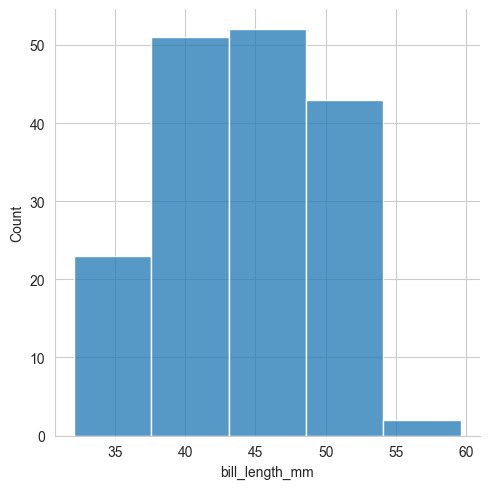

In [46]:
sns.displot(data=X_train, x='bill_length_mm',bins=5);

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

In [48]:
# Instantiate  KBinsDiscretizer object
bill_length_binner = KBinsDiscretizer(n_bins = 5, encode='onehot-dense', strategy='quantile').set_output(transform='pandas')

In [49]:
# Fit the variable binner on the 'bill_length_mm' column of the training data
bill_length_binner.fit(X_train[['bill_length_mm']])

,"n_bins n_bins: int or array-like of shape (n_features,), default=5The number of bins to produce. Raises ValueError if ``n_bins < 2``.",5
,"encode encode: {'onehot', 'onehot-dense', 'ordinal'}, default='onehot'Method used to encode the transformed result.- 'onehot': Encode the transformed result with one-hot encoding and return a sparse matrix. Ignored features are always stacked to the right.- 'onehot-dense': Encode the transformed result with one-hot encoding and return a dense array. Ignored features are always stacked to the right.- 'ordinal': Return the bin identifier encoded as an integer value.",'onehot-dense'
,"strategy strategy: {'uniform', 'quantile', 'kmeans'}, default='quantile'Strategy used to define the widths of the bins.- 'uniform': All bins in each feature have identical widths.- 'quantile': All bins in each feature have the same number of points.- 'kmeans': Values in each bin have the same nearest center of a 1D k-means cluster.For an example of the different strategies see::ref:`sphx_glr_auto_examples_preprocessing_plot_discretization_strategies.py`.",'quantile'
,"quantile_method quantile_method: {""inverted_cdf"", ""averaged_inverted_cdf"",""closest_observation"", ""interpolated_inverted_cdf"", ""hazen"",""weibull"", ""linear"", ""median_unbiased"", ""normal_unbiased""},default=""linear""Method to pass on to np.percentile calculation when usingstrategy=""quantile"". Only `averaged_inverted_cdf` and `inverted_cdf`support the use of `sample_weight != None` when subsampling is notactive... versionadded:: 1.7",'warn'
,"dtype dtype: {np.float32, np.float64}, default=NoneThe desired data-type for the output. If None, output dtype isconsistent with input dtype. Only np.float32 and np.float64 aresupported... versionadded:: 0.24",None
,"subsample subsample: int or None, default=200_000Maximum number of samples, used to fit the model, for computationalefficiency.`subsample=None` means that all the training samples are used whencomputing the quantiles that determine the binning thresholds.Since quantile computation relies on sorting each column of `X` andthat sorting has an `n log(n)` time complexity,it is recommended to use subsampling on datasets with avery large number of samples... versionchanged:: 1.3 The default value of `subsample` changed from `None` to `200_000` when `strategy=""quantile""`... versionchanged:: 1.5 The default value of `subsample` changed from `None` to `200_000` when `strategy=""uniform""` or `strategy=""kmeans""`.",200000
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for subsampling.Pass an int for reproducible results across multiple function calls.See the `subsample` parameter for more details.See :term:`Glossary `... versionadded:: 1.1",None


In [50]:
# Access and print the bin edges for the 'bill_length_mm' feature
bin_edges = bill_length_binner.bin_edges_
print("Bin edges for 'bill_length_mm':", bin_edges[0])

Bin edges for 'bill_length_mm': [32.1 38.6 42.2 46.2 49.6 59.6]


The bin edges represents the `quintiles`. They divides the the data into 5 more-or-less equal parts

In [51]:
# Get the quintiles
X_train[['bill_length_mm']].quantile(q=[0.,0.2,0.4,0.6,0.8,1.0]).rename({'bill_length_mm':'bill_quintiles'},axis=1)

,bill_quintiles
0.0,32.1
0.2,38.6
0.4,42.2
0.6,46.2
0.8,49.6
1.0,59.6


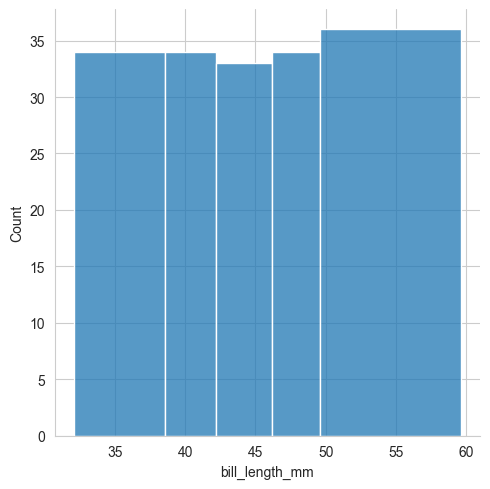

In [52]:
# Plotting the bill length distribution using the learnt bin edges 
sns.displot(data=X_train, x='bill_length_mm',bins=bin_edges[0]);

As shown in the plot above the heights of the bins are more-or-less equal.

In [53]:
# Transform 'bill_length_mm' using the quintile bins defined in 'bill_length_binner'
bill_length_binned_df_train = bill_length_binner.transform(X_train[['bill_length_mm']])
bill_length_binned_df_train

,bill_length_mm_0.0,bill_length_mm_1.0,bill_length_mm_2.0,bill_length_mm_3.0,bill_length_mm_4.0
178,0.0,0.0,0.0,1.0,0.0
213,0.0,0.0,1.0,0.0,0.0
246,0.0,0.0,0.0,1.0,0.0
185,0.0,0.0,0.0,0.0,1.0
216,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
284,0.0,0.0,0.0,0.0,1.0
18,0.0,0.0,1.0,0.0,0.0
154,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0


The following table shows you the mapping between one-hot-encoded categories and binned values:
| Category | Bin Values     |
|----------|----------------|
| 0        | 32.1 - 38.6   |
| 1        | 38.6 - 42.3|
| 2        | 42.3 - 46.2|
| 3        | 46.2 - 49.5|
| 4        | 49.5 - 59.6|


**How to read the 👆🏽 transformed DataFrame**?
+ The transformed DataFrame categorizes each penguin's `bill_length_mm` into one of five quintile categories (0 through 4). Each category corresponds to a specific range of bill lengths
+ Observation (the penguin) n 24 is labeled as '0', this indicates that the the bill length falls in the range from the miniimum 32.1 to the first quintile 38.6


In [54]:
# Bill_length value for the observation 24
X_train[['bill_length_mm']].loc[24]

bill_length_mm    35.3
Name: 24, dtype: float64

- `KBinsDiscritizer(strategy='quantile)`  similar to [qcut()](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) in Pandas 
- `KBinsDiscritizer(strategy='uniform)` similar to [cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) in Pandas

<hr style="border:2px solid black">

## 4. Numerical Feature Scaling - Normalizing Data Ranges

The goal of feature scaling is to transform numerical features to be on a similar scale.

For example, consider the following two features:
+ `income` spans from 20_000 to 100_000 euro:
+ `age` spans from 20 to 100 years
  
Without scaling, the income feature would disproportionately influence [any distance-based algorithms](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35/) because of its larger range of values compared to age.

By applying feature scaling, both income and age can be adjusted so that they **equally contribute to the model's learning**, thereby reflecting true feature importance and subsequently improving the model.


### 4.1 Min-Max Scaling 

It transforms all values of a numerical feature to a fixed range, typically between 0 and 1, by subtracting the minimum value and dividing by the range as shown in the formula below:

$$\large X_{scaled} = \large \dfrac{X - X_{min}}{X_{max} - X_{min}}$$

After transformation:
+ Features are constrained to a specific range (e.g., 0 to 1) 
  + Minimum value becomes 0, maximum value become 1, 
+ The original relationship between data points is preserved
  + Everything in between 0 and 1 is proportionally distributed
+ Outliers are not handled well.
  


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Instantiate the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1)).set_output(transform='pandas')

In [57]:
# Fit the scaler to the columns 'bill_length_mm' and 'flipper_length_mm' of the training data
min_max_scaler.fit(X=X_train[['bill_length_mm','flipper_length_mm']])

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [58]:
# Learnt Maximum values for each feature on the train data
print("Max values:", min_max_scaler.data_max_)

# Learnt Minimum values for each feature on the train data
print("Min values:", min_max_scaler.data_min_)

# Learnt Range for each feature on the train data
print("Range:", min_max_scaler.data_range_)

Max values: [ 59.6 230. ]
Min values: [ 32.1 176. ]
Range: [27.5 54. ]


In [59]:
X_train[['bill_length_mm','flipper_length_mm']].max()

bill_length_mm        59.6
flipper_length_mm    230.0
dtype: float64

In [60]:
# Scale the features
min_max_scaled_bill_fli_df_train = min_max_scaler.transform(X=X_train[['bill_length_mm','flipper_length_mm']])
min_max_scaled_bill_fli_df_train

,bill_length_mm,flipper_length_mm
178,0.632727,0.444444
213,0.494545,0.351852
246,0.570909,0.722222
185,0.640000,0.351852
216,0.636364,0.314815
...,...,...
284,0.643636,1.000000
18,0.505455,0.333333
154,0.483636,0.222222
8,0.360000,0.259259


In [61]:
min_max_scaled_bill_fli_df_train.describe()

,bill_length_mm,flipper_length_mm
count,171.000000,169.000000
mean,0.432982,0.469428
std,0.201625,0.254340
min,0.000000,0.000000
25%,0.263636,0.259259
50%,0.476364,0.407407
75%,0.616364,0.703704
max,1.000000,1.000000


**Note** that the **min** and **max** value for each features are respectively 0 and 1

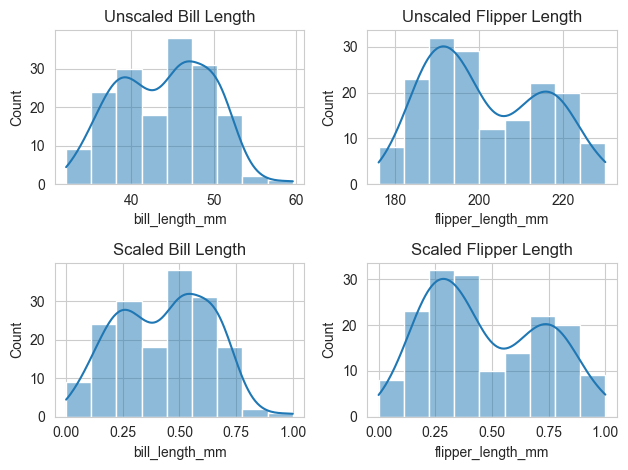

In [62]:
fig, ax = plt.subplots(nrows=2,ncols=2)

# Plotting unscaled data
sns.histplot(data=X_train, x='bill_length_mm', ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Unscaled Bill Length')

sns.histplot(data=X_train, x='flipper_length_mm', ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Unscaled Flipper Length')

# Plotting scaled data
sns.histplot(data=min_max_scaled_bill_fli_df_train, x='bill_length_mm', ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Scaled Bill Length')

sns.histplot(data=min_max_scaled_bill_fli_df_train, x='flipper_length_mm', ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Scaled Flipper Length')

# Adjust layout
plt.tight_layout()


As shown in the visualization above. The underlying pattern of the data remains preserved after min-max scaling. 


### 4.2 Standard Scaling

It transforms the values of a numerical feature so that they have a mean of zero and a standard deviation of one. This is accomplished by subtracting the mean of the feature from each value and then dividing by the standard deviation, as shown in the formula below:

$$\large X_{\text{standardized}} = \frac{X - \mu}{\sigma}$$

Where:
- $\mu$ is the mean of the feature values.
- $\sigma$ is the standard deviation of the feature values.

**After transformation:**
+ **Centered Data**: The mean of the transformed data is 0
+ **Unit Variance**: The standard deviation becomes 1, which means that feature variance is normalized.
+ **Preserves Relationships**: The original relationships between variables are maintained, similar to Min-Max scaling.
+ **Handling Outliers**: Standard scaling is less sensitive to outliers than Min-Max scaling because it does not compress the data into a fixed range.

 **[`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**

In [63]:
from sklearn.preprocessing import StandardScaler

### 4.3 Robust Scaling
It transforms the values of a numerical feature by subtracting the median and then dividing by the interquartile range (IQR), as shown in the formula below:

$$\large X_{\text{robust}} = \frac{X - \text{median}(X)}{\text{IQR}}$$

Where:
- **median(X)** is the median of the feature values.
- **IQR** is the interquartile range, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the feature values.

After transformation:
+ **Centered and Scaled Data**: The median of the transformed data becomes 0. The IQR used as the scaler normalizes the feature variance.
+ **Handling Outliers**: Since the median and IQR are less affected by outliers than the mean and standard deviation, this scaling method is much better suited for datasets with outliers.
+ **Preserving Relationships**: Like other scaling methods, robust scaling maintains the original relationships between variables that are not outliers.



**[`RobustScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)**

In [64]:
from sklearn.preprocessing import RobustScaler

### 4.4 Log Scaling
Log scaling is a non-linear transformation that uses the logarithmic function to reduce the range and variation of data values.

**Log transformation** applies a logarithmic scale to the values of a numerical feature, typically using the natural logarithm (base e), although any logarithm base can be used depending on the data and the specific needs. The transformation is given by the formula:

$$\large X_{\text{log}} = \log(X)$$

Where:
- **log()** denotes the logarithmic function, which could be to any base.

**After transformation:**
+ **Reduces Scale Differentials**: the scale of high magnitude values is more significantly compressed than those of low magnitude.
+ **Handling Skewness**: Converts a skewed distribution into one that is more uniform.
+ **Stabilizing Variance**: Variance near larger values is reduced more than variance near smaller values, which stabilizes variance across the dataset.
+ **Reducing Impact of Outliers**: Outliers that are far from the majority of data points become less dominating after log transformation due to the compression effect at higher value ranges.

**Considerations:**
- Log transformation can only be applied to positive values. For datasets containing zero or negative values, a constant may be added to each value before applying the log to shift all data into the positive domain.



While **scikit-learn** itself does not provide a direct transformer for log transformations, you can easily implement log transformation using a custom transformer with the help of [**FunctionTransformer**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html). This allows you to apply any function, including a logarithmic transformation, to your data.


In [65]:
from sklearn.preprocessing import FunctionTransformer

In [66]:
import numpy as np
# Define the log transformation function
# Adding a constant to avoid taking log of zero
def log_transformation(X, c):
    return np.log(X + c)

def inverse_log_transformation(Xlog, c):
    return np.exp(Xlog) - c

In [67]:
# Create the transformer using the log_transform function
log_transformer = FunctionTransformer(func=log_transformation, inverse_func=inverse_log_transformation, kw_args={'c':1}, inv_kw_args={'c':1}).set_output(transform='pandas')
                                                                                                                                                        

In [68]:
# Fit the transformer to the 'flipper_length_mm' column of X_train
log_transformer.fit(X=X_train[['flipper_length_mm']])

,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function log...t 0x1144dcea0>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",<function inv...t 0x1144dd8a0>
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",{'c': 1}
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",{'c': 1}


In [69]:
# Transform the data using the fitted transformer
log_transformed_flip_df_train = log_transformer.transform(X_train[['flipper_length_mm']])
log_transformed_flip_df_train

,flipper_length_mm
178,5.303305
213,5.278115
246,5.375278
185,5.278115
216,5.267858
...,...
284,5.442418
18,5.273000
154,5.241747
8,5.252273


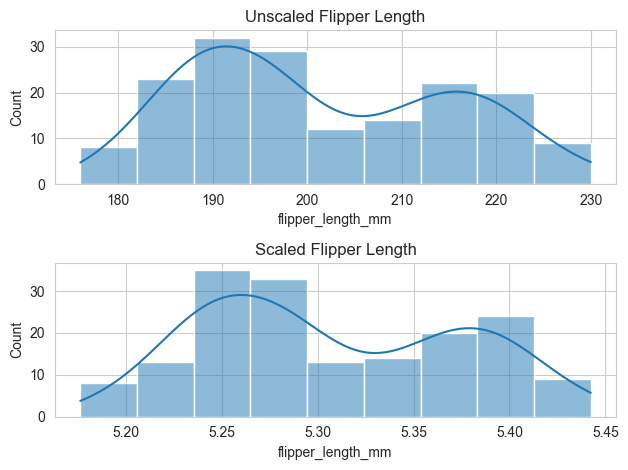

In [70]:
fig, ax = plt.subplots(nrows=2,ncols=1)

# Plotting unscaled data
sns.histplot(data=X_train, x='flipper_length_mm', ax=ax[0], kde=True)
ax[0].set_title('Unscaled Flipper Length')

sns.histplot(data=log_transformed_flip_df_train, x='flipper_length_mm', ax=ax[1], kde=True)
ax[1].set_title('Scaled Flipper Length')

# Adjust layout
plt.tight_layout()

#### Readings on Scaling
+ [Compare the effect of different scalers on data with otliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)
+ [Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

<hr style="border:2px solid black">

## 5. Feature Expansion
### `PolynomialFeatures`
We can use the scikit-learn [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to add polynomial or interaction features to our dataset. This transformer is particularly useful for capturing interactions between features in a nonlinear model. Here are some key points:

* `degree` - specifies the degree of the polynomial features (default is 2). For example, for a single feature \(X\), if `degree=2`, it generates \(X, X^2\).

* `interaction_only` - if set to `True`, this will produce features that are the product of distinct input features. For example, if two features are \(X_1\) and \(X_2\), it will generate \(X_1 \times X_2\) but not \(X_1^2\) or \(X_2^2\).

* `include_bias` - decides whether to include a bias column (the feature column consisting of ones). This can be set to `False` if a bias is already handled or not required in the model.

🚨**Very important**🚨:
+ **you scale your features first and then apply polynomial feature expansion**

### 5.1 `Polynomial Terms`

- Additional features obtained by an existing feature to some power
- Non-linear relationships can be modelled
- For some feature x, consider the model: 

$$
y = a_0 + a_1x + a_2x^2 +\ldots+\epsilon
$$

- Potential improvement of model accuracy, but increased risk of overfitting

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
# Instantiate the polynomial features object
poly_expansion = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False).set_output(transform='pandas')

In [73]:
poly_expansion.fit(min_max_scaled_bill_fli_df_train[['bill_length_mm']])

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [74]:
expanded_scaled_bill_length_df_train = poly_expansion.transform(min_max_scaled_bill_fli_df_train[['bill_length_mm']])
expanded_scaled_bill_length_df_train

,bill_length_mm,bill_length_mm^2
178,0.632727,0.400344
213,0.494545,0.244575
246,0.570909,0.325937
185,0.640000,0.409600
216,0.636364,0.404959
...,...,...
284,0.643636,0.414268
18,0.505455,0.255484
154,0.483636,0.233904
8,0.360000,0.129600


### 5.2 `Interaction Terms`

- For multiple initial features, there could be *interactions* (cross-polynomial terms)
- For 2 features, $x_0$ and $x_1$ for example, a 2nd-degree polynomial may contain:

$$
1,~x_0,~x_1,~x_0^2,~x_0x_1,~x_1^2
$$

- Each of the terms gets their own coefficient in a regression model
- Polynomial preprocessing function with `interaction_only = True`

In [75]:
# Instantiate the polynomial features object
poly_expansion = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False).set_output(transform='pandas')

Since PolynomialFeatures doesn’t support NaNs, we must preprocess the data before calling .fit()

Let's check for missing values first.

In [76]:
np.isnan(min_max_scaled_bill_fli_df_train).sum()

bill_length_mm       0
flipper_length_mm    2
dtype: int64

There are two missing values in the flipper_length variable. To handle this, we could apply various strategies you learned before, such as filling, imputing, or dropping. Since the data loss is minimal, let's simply drop them.

In [77]:
#drop missings in data frame
min_max_scaled_bill_fli_df_train.dropna(inplace = True)

In [78]:
#check for missings
np.isnan(min_max_scaled_bill_fli_df_train).sum()

bill_length_mm       0
flipper_length_mm    0
dtype: int64

In [79]:
poly_expansion.fit(X=min_max_scaled_bill_fli_df_train)

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [80]:
expanded_scaled_bill_fli_length_df_train = poly_expansion.transform(min_max_scaled_bill_fli_df_train)
expanded_scaled_bill_fli_length_df_train

,bill_length_mm,flipper_length_mm,bill_length_mm^2,bill_length_mm flipper_length_mm,flipper_length_mm^2
178,0.632727,0.444444,0.400344,0.281212,0.197531
213,0.494545,0.351852,0.244575,0.174007,0.123800
246,0.570909,0.722222,0.325937,0.412323,0.521605
185,0.640000,0.351852,0.409600,0.225185,0.123800
216,0.636364,0.314815,0.404959,0.200337,0.099108
...,...,...,...,...,...
284,0.643636,1.000000,0.414268,0.643636,1.000000
18,0.505455,0.333333,0.255484,0.168485,0.111111
154,0.483636,0.222222,0.233904,0.107475,0.049383
8,0.360000,0.259259,0.129600,0.093333,0.067215


**Note** that the column `bill_length_mm flipper_length_mm` represents the interaction term. If `interaction_only = True` the quadratic features `bill_length_mm^2` and `flipper_length_mm^2` will not be present.

<hr style="border:2px solid black">

## Bonus 🌶️🌶️🌶️


### Spiced Imputation


Previously, we looked at basic imputation methods that use simple statistics like the **mean** or **median** from the same column with missing values.
As always, there is more to dicover. There are also more advanced imputation techniques that consider relationships between different features.

#### Group-wise Mean/Median/Mode Imputation:
Imputes missing values based on the mean, median, or mode calculated within subgroups of the data.

To build a group-wise imputer that follows the scikit-learn interface of `.fit()` and `.transform()`, we will create a custom class based  on scikit-learn's `BaseEstimator` and `TransformerMixin` classes

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

In [82]:
class GroupMeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_column, target_columns):
        # Initialize with the name of the group column and a list of target columns
        self.group_column = group_column
        self.target_columns = target_columns

    def fit(self, X, y=None):
        # Calculate the mean for each target column within each group
        self.means_ = {}
        # Calculate the unique categories in the group  column
        self.categories_ = X[self.group_column].unique()
        for column in self.target_columns:
            self.means_[column] = X.groupby(self.group_column)[column].mean().to_dict()
        return self

    def transform(self, X):
        # Apply the learned means_ to fill in missing values for each target column
        X = X.copy()
        for column in self.target_columns:
            # Get the group means_ for the current column
            for category in self.categories_:
                group_means = self.means_[column][category]
                # Fill missing values for the current column based on its group mean
                X.loc[:, column] = X.groupby(self.group_column)[column].fillna(group_means)
            
        return X[self.target_columns]

In [83]:
# Instantiate the group-wise imputer
group_mean_imputer = GroupMeanImputer(group_column='island', target_columns=['bill_depth_mm','flipper_length_mm'])

In [84]:
# Fit the imputer 
group_mean_imputer.fit(X=X_train)

,group_column,'island'
,target_columns,"['bill_depth_mm', 'flipper_length_mm']"


In [85]:
group_mean_imputer.means_

{'bill_depth_mm': {'Biscoe': 15.78170731707317,
  'Dream': 18.236923076923077,
  'Torgersen': 18.569565217391304},
 'flipper_length_mm': {'Biscoe': 210.8641975308642,
  'Dream': 193.27692307692308,
  'Torgersen': 190.65217391304347}}

In [86]:
group_mean_imputer.categories_

array(['Dream', 'Biscoe', 'Torgersen'], dtype=object)

In [87]:
group_mean_imputer.transform(X=X_train)

,bill_depth_mm,flipper_length_mm
178,19.0,200.0
213,17.0,195.0
246,15.0,215.0
185,18.6,195.0
216,18.2,193.0
...,...,...
284,16.8,230.0
18,21.5,194.0
154,18.7,188.0
8,20.2,190.0


### Model Imputation:
+ Use a model to predict the missing values based on other variables
+ For iterative imputation in scikit-learn there is  [IterativeImputer()](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)

### K-Nearest Neighbors (KNN) Imputation:
+ Imputes missing entries based on the k-nearest neighbors found by measuring distance from other points.
+ In scikit-learn there is [KNNImputer()](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)